In [78]:
import pandas as pd

In [79]:
survey_df=pd.read_csv('survey_results.csv')
survey_df.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [80]:
survey_df.isnull().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8064
consume_frequency(weekly)            8
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

# Task-1
Remove Duplicates:

•	Investigate if the dataset contains duplicate entries. Consider which columns could help identify duplicates. Think about how duplicate records might affect the outcome of the model and remove them accordingly.


In [81]:
survey_df.shape

(30010, 17)

In [82]:
#total duplicate records
survey_df.duplicated('respondent_id').sum()

10

In [83]:
survey_df=survey_df.drop_duplicates('respondent_id',)

In [84]:
survey_df.shape

(30000, 17)

How many duplicate rows are present in the data?
# Ans-1:10

# Task-2
Outlier Detection in Age:

•	Explore the 'age' column to spot potential outliers. You can use statistical methods or visualizations (e.g., box plots) to help identify these. Reflect on why it's important to handle these outliers. Based on your findings, decide whether to keep, adjust, or remove them.


In [85]:
survey_df['age'].describe()

count    30000.000000
mean        33.048167
std         13.438904
min         18.000000
25%         23.000000
50%         31.000000
75%         40.000000
max        604.000000
Name: age, dtype: float64

In [86]:
#### min (18) is okay but max(604 is purely outlier)

In [87]:
survey_df.age.info() # data type is int so no problem

<class 'pandas.core.series.Series'>
Index: 30000 entries, 0 to 30009
Series name: age
Non-Null Count  Dtype
--------------  -----
30000 non-null  int64
dtypes: int64(1)
memory usage: 468.8 KB


In [88]:
# As outlier will influence mean, we should use IQR for outlier detection

In [89]:
age_q1=int(survey_df.age.quantile(0.25))
age_q3=int(survey_df.age.quantile(0.75))
age_IQR=age_q3-age_q1
print("Age:")
print("Quantile 1:",age_q1)
print("Quantile 3:",age_q3)
print("IQR:",age_IQR)

age_low=round(age_q1-age_IQR*1.5)
age_high=round(age_q3+age_IQR*1.5)

print("Lowest Age in IQR test:",age_low)
print("Highest Age in IQR test:",age_high)


Age:
Quantile 1: 23
Quantile 3: 40
IQR: 17
Lowest Age in IQR test: -2
Highest Age in IQR test: 66


In [90]:
survey_df[(survey_df.age>66)]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
71,R00072,70,F,Urban,Entrepreneur,<10L,3-4 times,Established,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Low (Not very concerned),Casual (eg. At home),150-200
117,R00118,68,F,Metro,Retired,10L - 15L,5-7 times,Established,Small (250 ml),0 to 1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Casual (eg. At home),150-200
215,R00216,67,M,Metro,Entrepreneur,10L - 15L,5-7 times,Established,Medium (500 ml),above 4,Availability,Exotic,Retail Store,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
392,R00393,69,F,Semi-Urban,Retired,<10L,5-7 times,Newcomer,Large (1 L),0 to 1,Availability,Exotic,Online,Simple,High (Very health-conscious),Casual (eg. At home),150-200
591,R00592,69,F,Rural,Entrepreneur,<10L,5-7 times,Established,Small (250 ml),0 to 1,Availability,Traditional,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29856,R29847,67,F,Urban,Entrepreneur,> 35L,0-2 times,Established,Small (250 ml),above 4,Quality,Exotic,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),200-250
29942,R29933,70,M,Semi-Urban,Retired,16L - 25L,5-7 times,Established,Small (250 ml),0 to 1,Brand Reputation,Exotic,Online,Simple,Low (Not very concerned),Casual (eg. At home),100-150
29944,R29935,67,M,Urban,Retired,<10L,5-7 times,Newcomer,Large (1 L),0 to 1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Social (eg. Parties),200-250
29985,R29976,70,F,Urban,Retired,<10L,3-4 times,Newcomer,Small (250 ml),0 to 1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Casual (eg. At home),150-200


In [91]:
# I prefer to remove data that are greater 70 age (as they are very less in number)
survey_df[(survey_df.age>70)]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
3099,R03098,453,M,Metro,Working Professional,26L - 35L,3-4 times,Established,Medium (500 ml),2 to 4,Brand Reputation,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
6262,R06260,428,M,Urban,Entrepreneur,16L - 25L,5-7 times,Established,Large (1 L),above 4,Quality,Exotic,Online,Simple,High (Very health-conscious),Social (eg. Parties),200-250
12403,R12398,604,M,Metro,Retired,<10L,0-2 times,Newcomer,Small (250 ml),2 to 4,Availability,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
22549,R22542,457,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
22918,R22911,267,F,Metro,Working Professional,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
24958,R24950,285,M,Semi-Urban,Working Professional,> 35L,0-2 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200
24960,R24952,192,F,Urban,Student,NaN,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
25105,R25096,203,M,Metro,Working Professional,16L - 25L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
28770,R28761,428,F,Rural,Working Professional,26L - 35L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200


#### I am removing record with age>70 but not removing age<=70 evenif IQR test give value 66 (because data can be useful) 

In [92]:
survey_df_2=survey_df[survey_df.age<=70]

In [93]:
survey_df_2.shape

(29991, 17)

### Others column outlier checking just by common sense


In [94]:
survey_df_2.describe()

,age
count,29991.000000
mean,32.947484
std,11.906077
min,18.000000
25%,23.000000
50%,31.000000
75%,40.000000
max,70.000000


##### No other column is numerical

What is the maximum outlier value in the age column?
# Ans-2:604

# Task-3
Handling Missing Data:

•	For the 'income_levels' column, missing values can be problematic. What would be a reasonable way to replace them? (Hint: Consider using "Not Reported" for missing income levels)

•	For the   and 'purchase_channel' columns, think about the best way to fill missing values. Could the most common (mode) values be an appropriate replacement? Investigate the distributions before making a decision.


In [95]:
survey_df_2.isnull().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8060
consume_frequency(weekly)            8
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

In [96]:
survey_df_3=survey_df_2.copy()

## Income level

In [97]:
survey_df_3.income_levels=survey_df_3.income_levels.fillna('Not Reported')

In [98]:
survey_df_3.income_levels.value_counts()

income_levels
Not Reported    8060
16L - 25L       5897
10L - 15L       5251
<10L            4661
26L - 35L       3872
> 35L           2250
Name: count, dtype: int64

### A question: Will it be usefull for model
#### We can should drop not reported during one hot encoding (this will be good I think)

## purchase_channel 

<Axes: >

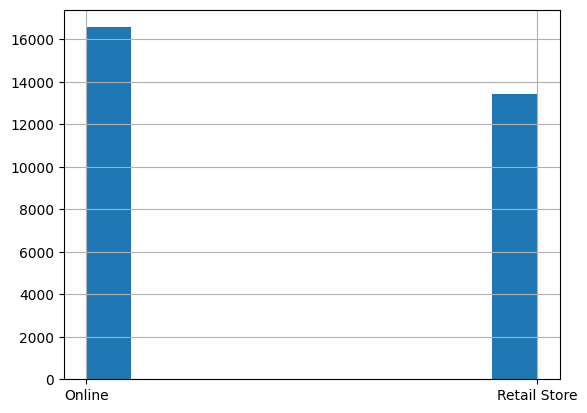

In [99]:
survey_df_3.purchase_channel.hist()

In [100]:
survey_df_3.purchase_channel.value_counts()

purchase_channel
Online          16562
Retail Store    13419
Name: count, dtype: int64

There are only 10 missing value we can replace it with just Online
Because that will not affect much to the model

In [101]:
purchase_channel_mode=survey_df_3.purchase_channel.mode()[0]
survey_df_3.purchase_channel=survey_df_3.purchase_channel.fillna(purchase_channel_mode)


In [102]:
purchase_channel_mode

'Online'

In [103]:
survey_df_3.isnull().sum()

respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         8
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
dtype: int64

## consume_frequency(weekly)

In [104]:
survey_df_3['consume_frequency(weekly)'].value_counts()

consume_frequency(weekly)
3-4 times    11786
5-7 times     9774
0-2 times     8423
Name: count, dtype: int64

We can replace 8 missing values with the mode easily

In [105]:
consume_frequency_mode=survey_df_3['consume_frequency(weekly)'].mode()[0]
survey_df_3['consume_frequency(weekly)']=survey_df_3['consume_frequency(weekly)'].fillna(consume_frequency_mode)


In [106]:
survey_df_3.isnull().sum()

respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
dtype: int64

How many null values are present in the consume_frequency(weekly) column? 

What is the mode value used to fill these null values?

# Ans-3:8,3-4 times

# Task-4
Correcting Spelling Mistakes in Categorical Data:

•	Review the entries in the 'zone' and 'current_brand' columns. Are there any inconsistencies in spelling or formatting? How could you identify and fix these issues to ensure uniform categories?


## Zone

In [107]:
survey_df_3.zone.value_counts()

zone
Metro         11906
Urban         10686
Semi-Urban     5274
Rural          2116
urbna             5
Metor             4
Name: count, dtype: int64

urbna->Urban , Metor->Metro

In [108]:
survey_df_4=survey_df_3.copy()

In [109]:
survey_df_4.zone=survey_df_4.zone.replace({'urbna':'Urban','Metor':'Metro'})

In [110]:
survey_df_4.zone.value_counts()

zone
Metro         11910
Urban         10691
Semi-Urban     5274
Rural          2116
Name: count, dtype: int64

## current_brand

In [111]:
survey_df_4.current_brand.value_counts()

current_brand
Established    15442
Newcomer       14499
newcomer          30
Establishd        20
Name: count, dtype: int64

newcomer->Newcomer, Establishd->Established

In [112]:
survey_df_4.current_brand=survey_df_4.current_brand.replace({'newcomer':'Newcomer','Establishd':'Established'})


In [113]:
survey_df_4.current_brand.value_counts()

current_brand
Established    15462
Newcomer       14529
Name: count, dtype: int64

## Other columns check

In [114]:
for col in survey_df_4.columns:
    print(col)
    print(survey_df_4[col].unique())
    print()

respondent_id
['R00001' 'R00002' 'R00003' ... 'R29998' 'R29999' 'R30000']

age
[30 46 41 33 23 22 45 31 27 49 44 19 24 32 56 54 37 63 52 40 35 21 34 26
 18 20 25 39 53 28 59 36 50 29 43 42 38 70 51 68 48 62 60 65 47 67 64 55
 66 57 61 69 58]

gender
['M' 'F']

zone
['Urban' 'Metro' 'Rural' 'Semi-Urban']

occupation
['Working Professional' 'Student' 'Entrepreneur' 'Retired']

income_levels
['<10L' '> 35L' '16L - 25L' 'Not Reported' '10L - 15L' '26L - 35L']

consume_frequency(weekly)
['3-4 times' '5-7 times' '0-2 times']

current_brand
['Newcomer' 'Established']

preferable_consumption_size
['Medium (500 ml)' 'Large (1 L)' 'Small (250 ml)']

awareness_of_other_brands
['0 to 1' '2 to 4' 'above 4']

reasons_for_choosing_brands
['Price' 'Quality' 'Availability' 'Brand Reputation']

flavor_preference
['Traditional' 'Exotic']

purchase_channel
['Online' 'Retail Store']

packaging_preference
['Simple' 'Premium' 'Eco-Friendly']

health_concerns
['Medium (Moderately health-conscious)' 'Low (Not 

How many rows contain misspellings of the category 'Metro'?
# Ans-4:4

# All set

# Saving Data

In [115]:
survey_df_4.to_csv("cleaned_survey_data.csv",index=False)